# Predicting bankruptcy from financial indicators

<b> Outline of the Project : </b>
    
    1. Data Import 
    2. Exploratory Analysis 
    3. Data Cleaning 
        >Imputation
        >Outlier Detection 
    4. Feature Selection 
    5. Solving Class Imbalance 
    6. Data Modelling 
    7. Hyperparameter Tuning 

In [2]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

#set seaborn as default
sns.set()

In [3]:
#Read the file into a DataFrame: data
data = pd.read_csv('bankruptcy.csv')
data_bkp = pd.read_csv('bankruptcy.csv')

<b> Exploratory Data Analysis </b>

In [4]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [6]:
#Covert the class variable to binary integer values 
data['class'] = data['class'].replace(["b'0'","b'1'"],[0,1])
data.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class       int64
Length: 65, dtype: object

In [7]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000,10503.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800,0.047129
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315,0.211926
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350,0.000000
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300,0.000000
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750,0.000000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000,1.000000


From the above observation, definitely the data has outliers for most of the features. Before proceeding to visualise the distribution of the data - Data cleaning needs to be done. 

<b> Data Cleaning </b>

In [8]:
#Check for duplicate entries 
data = data.drop_duplicates()
data.info()
#10503 to 10416 entries 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10416 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10416 non-null  float64
 1   Attr2   10416 non-null  float64
 2   Attr3   10416 non-null  float64
 3   Attr4   10398 non-null  float64
 4   Attr5   10391 non-null  float64
 5   Attr6   10416 non-null  float64
 6   Attr7   10416 non-null  float64
 7   Attr8   10402 non-null  float64
 8   Attr9   10413 non-null  float64
 9   Attr10  10416 non-null  float64
 10  Attr11  10416 non-null  float64
 11  Attr12  10398 non-null  float64
 12  Attr13  10373 non-null  float64
 13  Attr14  10416 non-null  float64
 14  Attr15  10408 non-null  float64
 15  Attr16  10402 non-null  float64
 16  Attr17  10402 non-null  float64
 17  Attr18  10416 non-null  float64
 18  Attr19  10373 non-null  float64
 19  Attr20  10373 non-null  float64
 20  Attr21  9611 non-null   float64
 21  Attr22  10416 non-null  float64
 22

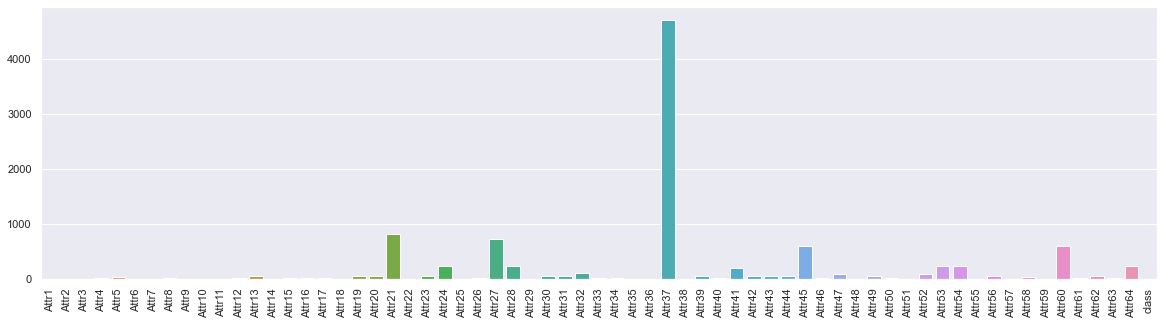

In [9]:
#Dealing with NULL values in the dataset 
plt.figure(figsize=(20,5)) 
sns.barplot(x=data.columns,y=data.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

Theoretically 25 to 30% is the maximum missing values that are allowed. Otherwise, the column is usually dropped from the analysis. 

In [10]:
x = ((data.isnull().sum()/10416)*100).round(2).to_frame().reset_index()
x.columns = x.columns.astype(str)
x.rename(columns={'index': 'Features', '0': 'Percentage of null values'}, inplace=True)
x.sort_values('Percentage of null values',ascending = False).head(10)

,Features,Percentage of null values
36,Attr37,45.15
20,Attr21,7.73
26,Attr27,6.85
44,Attr45,5.65
59,Attr60,5.65
23,Attr24,2.18
52,Attr53,2.16
27,Attr28,2.16
53,Attr54,2.16
63,Attr64,2.16


In [11]:
#Remove Attr 37 column since it has more than 30% NULL values 
data.drop(columns = ['Attr37'], inplace = True)

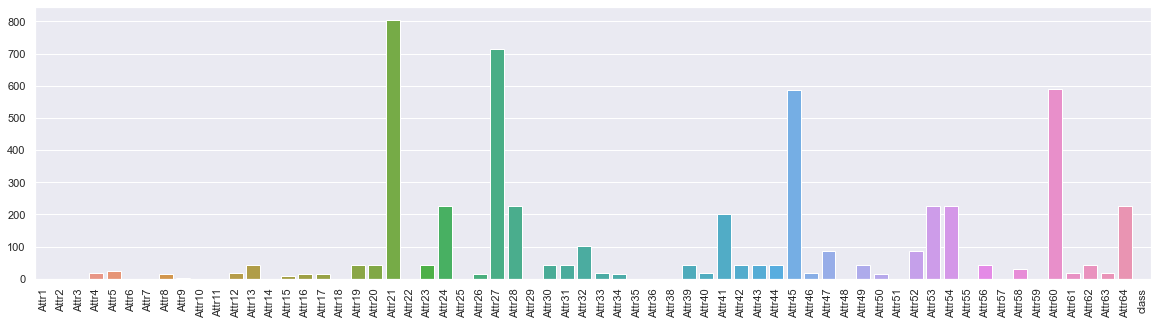

In [12]:
plt.figure(figsize=(20,5)) 
sns.barplot(x=data.columns,y=data.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

<b>Data Imputation</b>

Mean, Median, Mode imputation 

In [13]:
def mean_imputation (col,df):
    df[col].fillna(df[col].mean(), inplace=True)

def median_imputation (col,df):
    df[col].fillna(df[col].median(), inplace=True)
    
def mode_imputation (col,df):
    df[col].fillna(df[col].mode(), inplace=True)

In [14]:
"""Data Imputation must be done seperately when categorical variables are present. Hence, splitting the data based on "CLASS" 
and then performing median imputation"""

data_med_0 = data[data['class']==0].copy(deep=True)
data_med_1 = data[data['class']==1].copy(deep=True)
for i in data_med_0.columns :
    median_imputation(i,data_med_0) 
    median_imputation(i,data_med_1)

data_imputed = pd.concat([data_med_0,data_med_1])
data_imputed['Attr1'].count()

10416

<b> Outlier Detection </b>

1. Box Plot Method 

Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:

    1. Arrange your data in ascending order
    2. Calculate Q1 ( the first Quarter)
    3. Calculate Q3 ( the third Quartile)
    4. Find IQR = (Q3 - Q1)
    5. Find the lower Range = Q1 -(1.5 * IQR)
    6. Find the upper Range = Q3 + (1.5 * IQR)
    
Replace the Outliers with Median Values so that there is no loss of data.

In [15]:
def IQR_Method(column,df):
    
    median = df[column].median()
    # First quartile (Q1)
    Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')

    # Interquartile Range 
    IQR = Q3-Q1

    #Lower and Upper Bounds
    lower_Range = Q1 -(1.5 * IQR)
    upper_Range = Q3 + (1.5 * IQR)

    #Replace the respective rows with Median
    df.loc[(df[column] > upper_Range) | (df[column] < lower_Range),column]=median

In [16]:
data_IQR = data_imputed.copy()
data_IQR.drop('class',axis=1,inplace=True)
for i in data_IQR.columns:
    IQR_Method(i,data_IQR)

In [17]:
data_IQR['Attr1'].count()

10416

In [18]:
data_IQR.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,...,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000
mean,0.055136,0.472371,0.226997,1.796074,2.111473,0.007972,0.064752,1.373314,1.421165,0.511774,...,1375.316382,0.060446,0.126143,0.943786,0.066271,11.046171,7.019367,75.899561,5.592585,4.725044
std,0.087481,0.271055,0.288052,1.138569,70.087903,0.038961,0.100987,1.395672,0.716413,0.268946,...,2503.846392,0.084989,0.175498,0.081966,0.132988,7.853113,3.731540,47.424465,3.548511,3.994904
min,-0.184000,0.000000,-0.586760,0.002080,-213.940000,-0.106240,-0.208300,-2.081800,-0.000084,-0.344980,...,-6362.100000,-0.180070,-0.389200,0.697060,-0.351810,0.000000,-0.014534,0.000000,-0.000156,-0.000102
25%,0.008146,0.254553,0.037927,1.040575,-31.871250,0.000000,0.010145,0.430470,1.011800,0.322100,...,101.472500,0.014462,0.027524,0.906075,0.000000,5.737500,4.493025,40.871000,3.066625,2.061900
50%,0.043056,0.464845,0.198655,1.606225,1.796750,0.000000,0.051004,1.109825,1.201700,0.514595,...,875.855000,0.052193,0.107275,0.952970,0.002706,10.019500,6.680650,70.388000,5.150975,4.081700
75%,0.101125,0.662690,0.419517,2.196550,34.968500,0.000000,0.119587,1.802325,1.771100,0.723760,...,1896.400000,0.099567,0.208860,0.988783,0.062784,12.996000,8.678500,100.080000,7.254775,5.621175
max,0.308150,1.344900,1.000000,5.820000,217.850000,0.177160,0.352220,6.447700,3.645600,1.000000,...,10647.000000,0.315040,0.668860,1.175400,0.600810,41.054000,19.824000,233.560000,17.588000,20.640000


2. Isolation Forest Method 

In [19]:
def Isolation_Forest(df):
    model=IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0)
    model.fit(df)
    df['anomaly']=model.predict(df)
    anomaly=df.loc[df['anomaly']==-1]
    anomaly_index=list(anomaly.index)
    df.drop(df[df['anomaly'] ==-1].index , inplace=True)
    print("\f The total number of anomalities in data is ", len(anomaly))
    

In [20]:
data_IF = data_imputed.copy()
data_IF.drop(columns='class',inplace=True)
Isolation_Forest(data_IF)

 The total number of anomalities in data is  214


In [21]:
data_IF['Attr1'].count()

10202

In [22]:
data_IF.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,anomaly
count,10202.000000,10202.000000,10202.000000,10202.000000,1.020200e+04,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,...,10202.000000,10202.000000,10202.000000,10202.000000,1.020200e+04,10202.000000,1.020200e+04,10202.000000,10202.000000,10202.0
mean,0.053907,0.508427,0.202892,2.983761,-1.357501e+03,-0.002433,0.066594,3.059426,1.717256,0.477605,...,0.104205,-0.004549,3.271621,1.484996,5.231573e+02,13.365983,-1.243639e+02,7.908249,33.451418,1.0
std,0.183923,0.413033,0.397475,6.126553,1.201541e+05,0.953248,0.194192,10.950171,1.377107,0.441143,...,2.913010,18.736299,184.200908,78.384277,3.649477e+04,78.998707,2.313426e+04,12.115905,401.720099,0.0
min,-2.046600,0.000000,-4.028000,0.006468,-1.190300e+07,-70.966000,-2.046600,-2.081800,-1.215700,-15.643000,...,-13.287000,-1667.300000,-1.328100,-142.790000,0.000000e+00,-0.014534,-2.336500e+06,-0.000156,-0.000102,1.0
25%,0.001279,0.258927,0.020291,1.046700,-5.083425e+01,0.000000,0.003272,0.439073,1.014550,0.300720,...,0.006609,0.007391,0.876842,0.000000,5.739725e+00,4.532400,4.119675e+01,3.101225,2.077975,1.0
50%,0.043882,0.464850,0.199380,1.604450,1.769950e+00,0.000000,0.052128,1.109850,1.205200,0.514595,...,0.052570,0.106740,0.952790,0.004421,1.001950e+01,6.696950,7.032750e+01,5.163400,4.081700,1.0
75%,0.123422,0.686192,0.415758,2.896875,5.474100e+01,0.075123,0.142075,2.770600,2.064100,0.720355,...,0.128873,0.268787,0.995040,0.251458,1.993950e+01,10.573250,1.167875e+02,8.820775,9.518175,1.0
max,3.115500,16.643000,17.708000,239.000000,6.854400e+05,17.113000,2.319800,757.070000,31.417000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,7.742900e+03,508.380000,21499.000000,1.0


<b> Data Visualisation </b>

In [23]:
data_clean = data_IQR.copy()
data_clean['class'] = data_imputed['class']

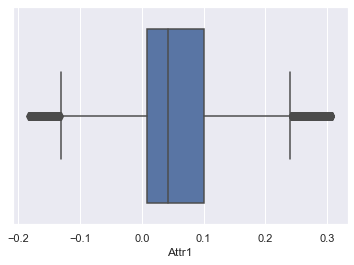

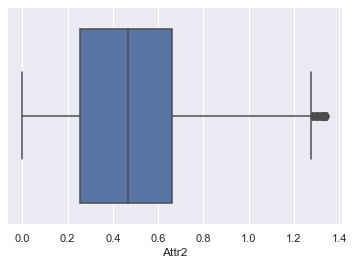

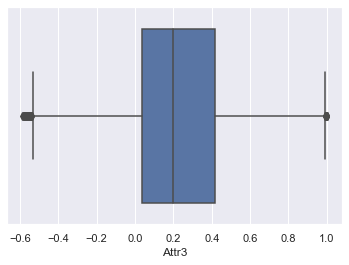

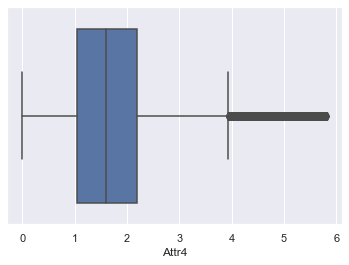

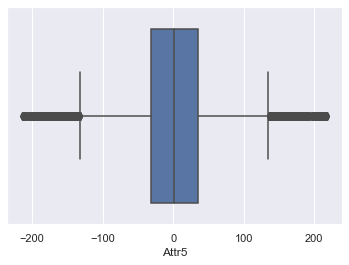

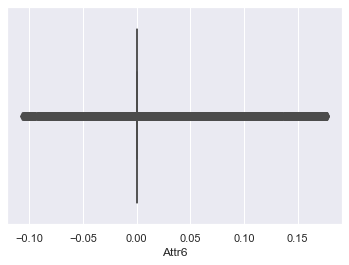

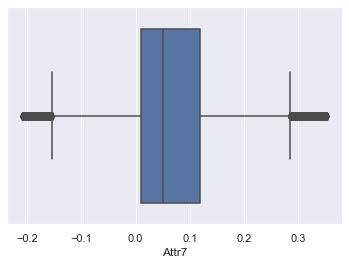

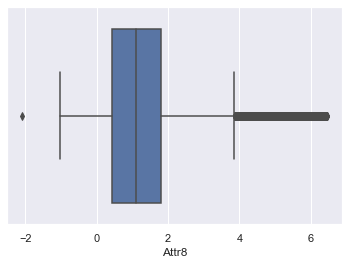

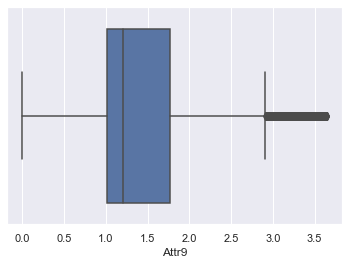

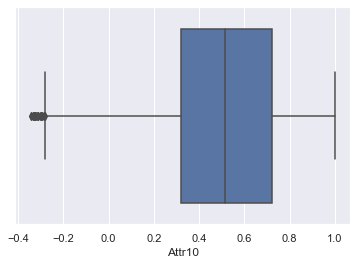

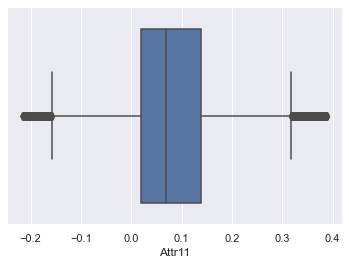

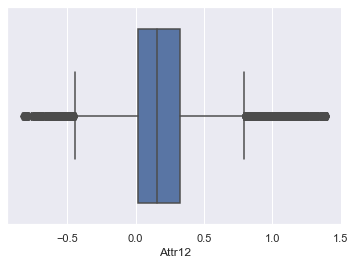

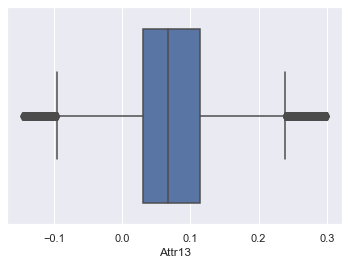

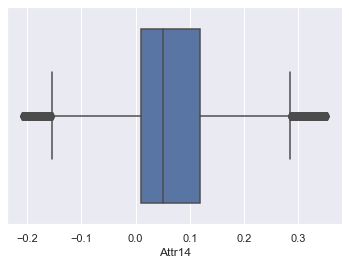

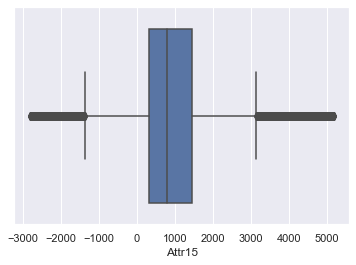

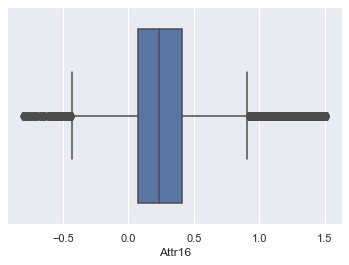

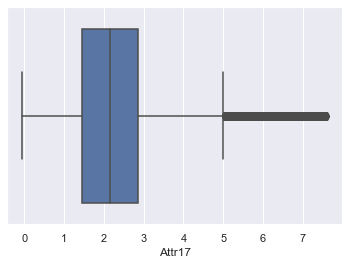

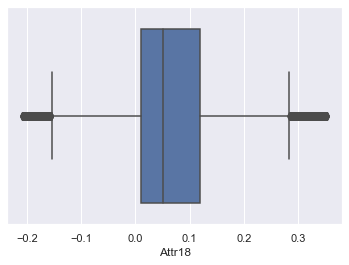

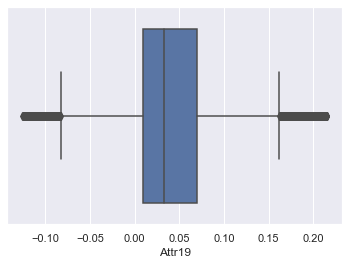

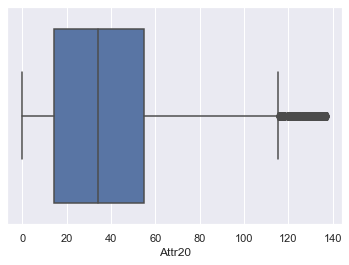

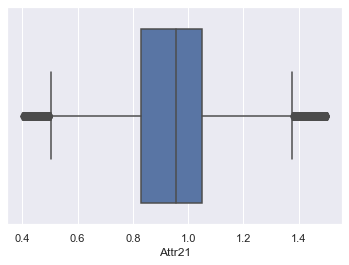

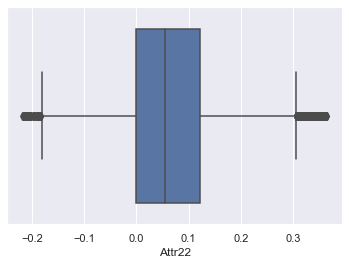

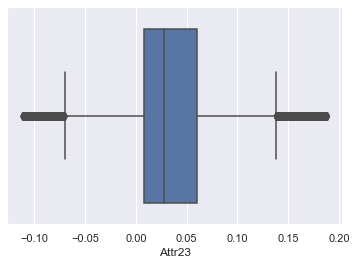

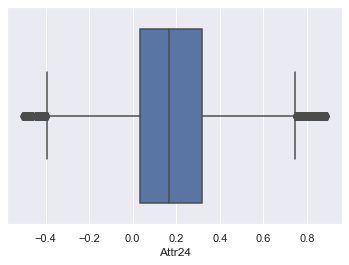

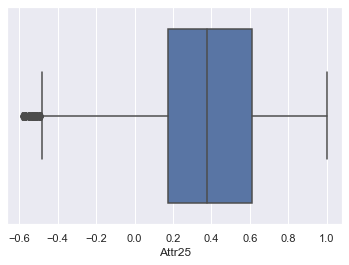

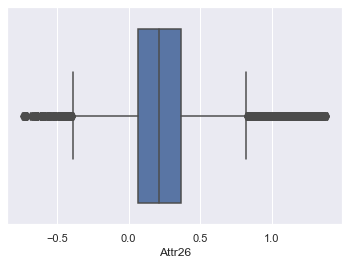

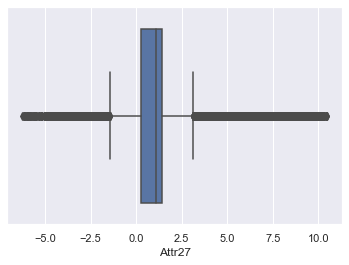

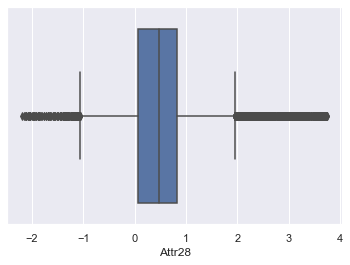

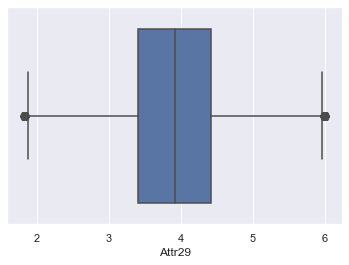

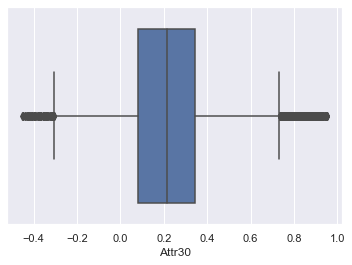

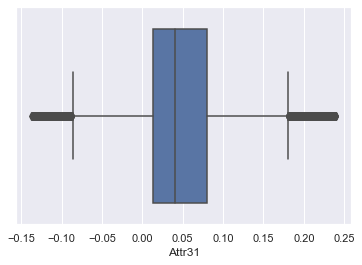

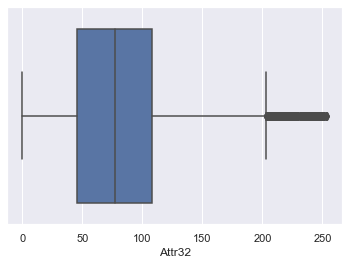

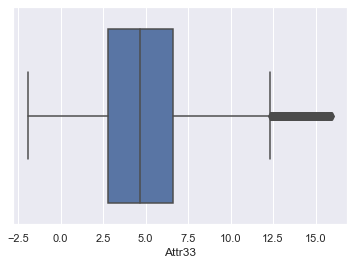

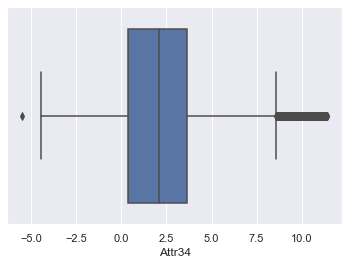

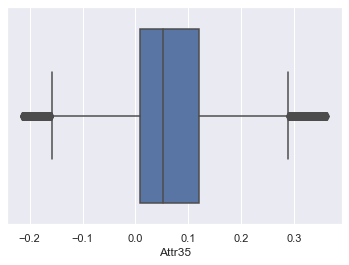

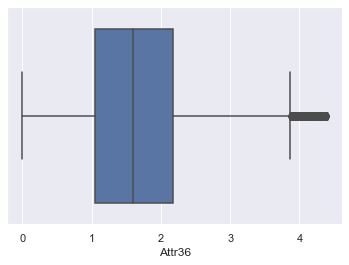

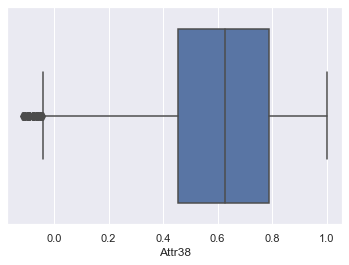

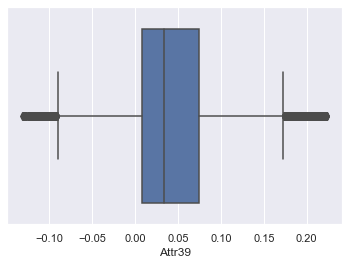

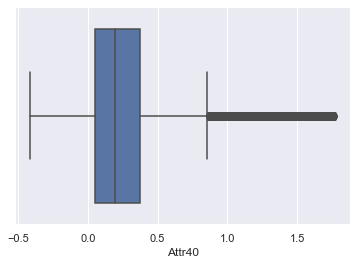

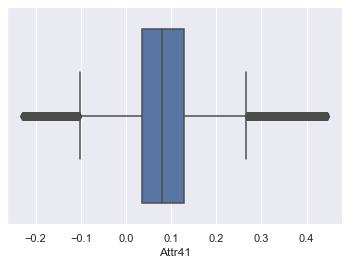

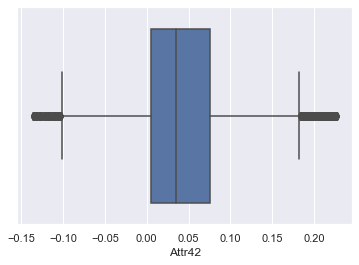

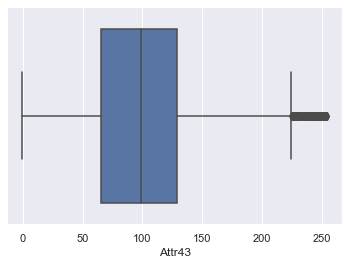

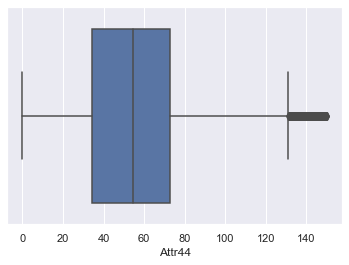

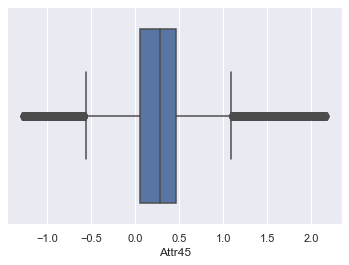

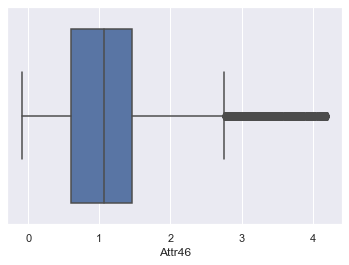

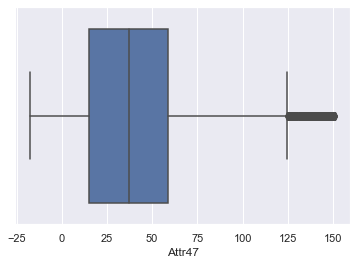

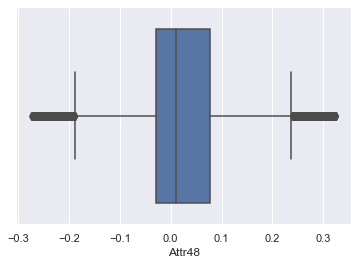

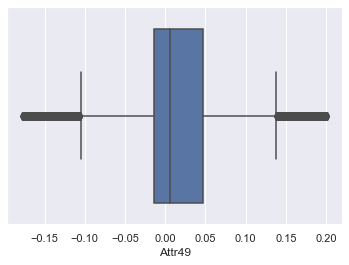

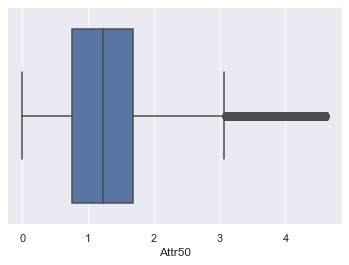

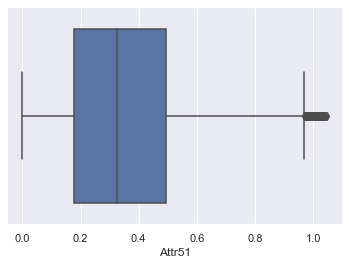

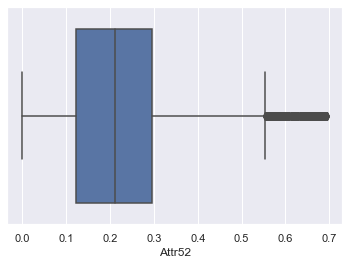

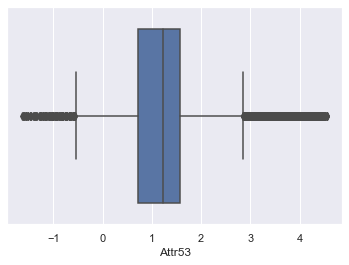

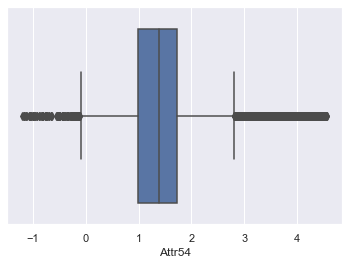

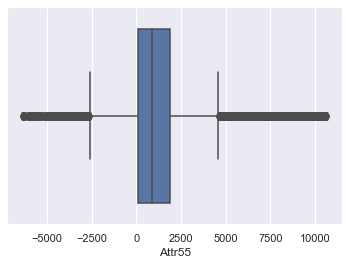

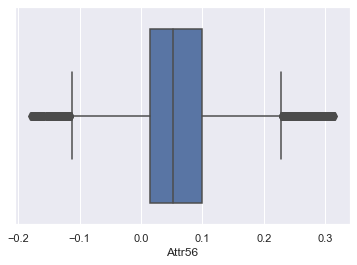

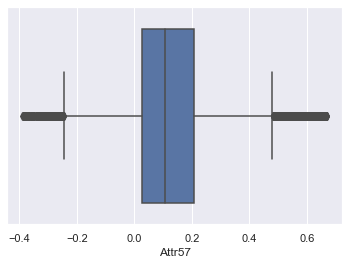

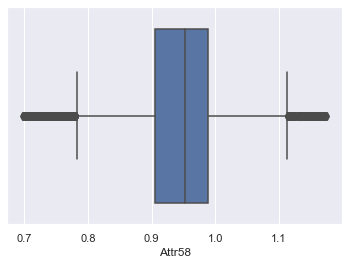

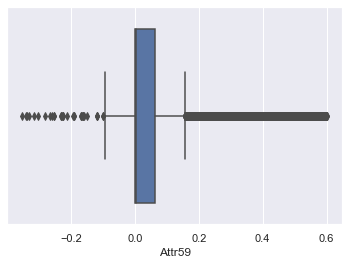

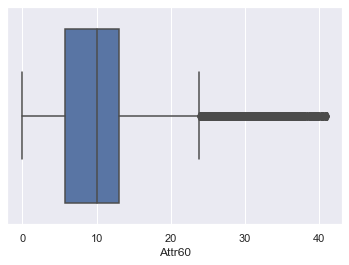

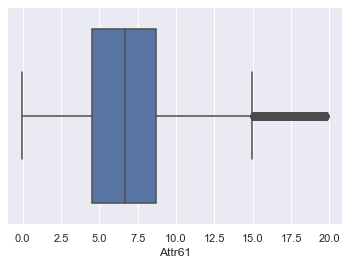

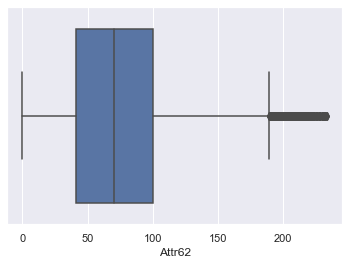

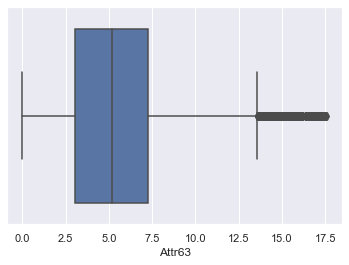

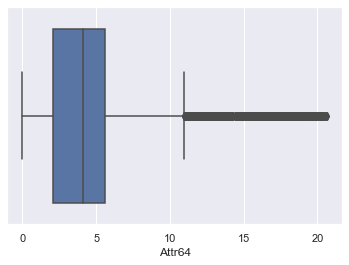

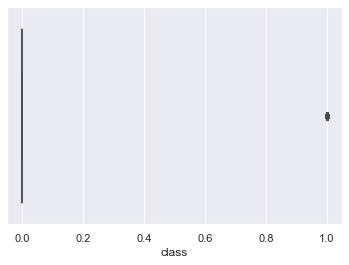

In [30]:
for i in data_clean.columns:
    sns.boxplot(x=data_clean[i])
    plt.show()

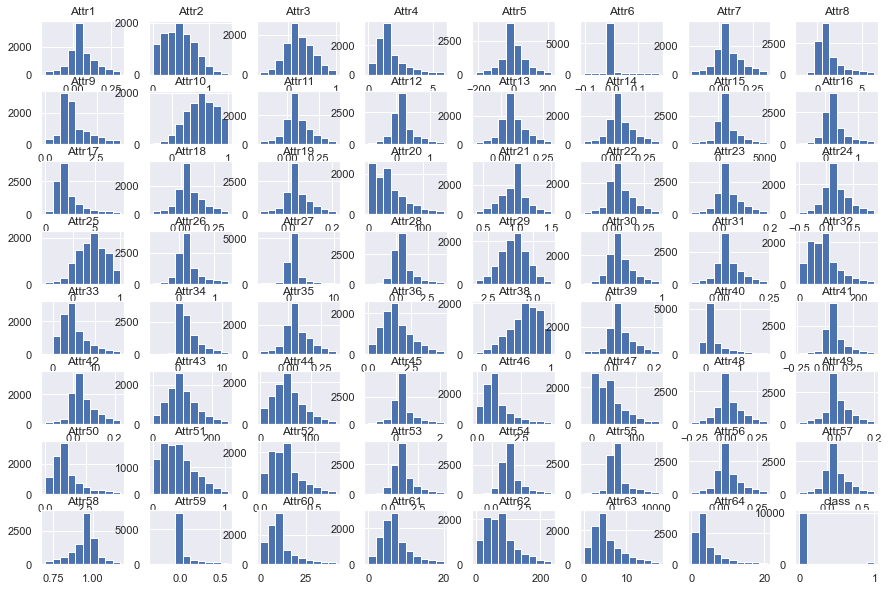

In [25]:
#Distribution of all features in the dataset 
"""for column in data_clean:
    sns.displot(data_clean, x=column, hue="class")
    plt.show()"""

data_clean.hist(figsize=(15, 10))
plt.show()

<b> Data Imbalance </b>

We can oversample the minority class using replacement. This technique is called oversampling

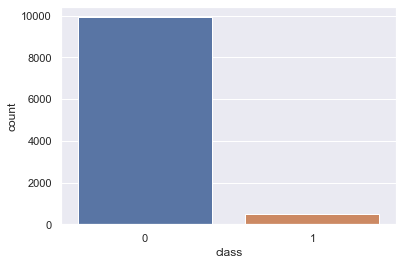

In [32]:
sns.countplot(x=data_clean['class'])
plt.show()

1. Simple Re-sampling 

In [35]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_clean[(data_clean['class']==0)] 
df_minority = data_clean[(data_clean['class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 9923, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

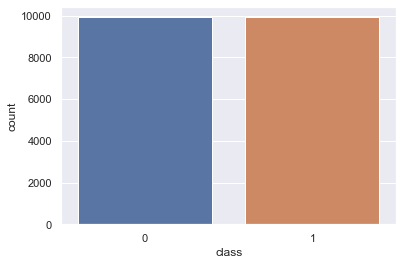

In [36]:
sns.countplot(x=df_upsampled['class'])
plt.show()

2. SMOTE

In [37]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(data_clean.drop('class', axis=1), data_clean['class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

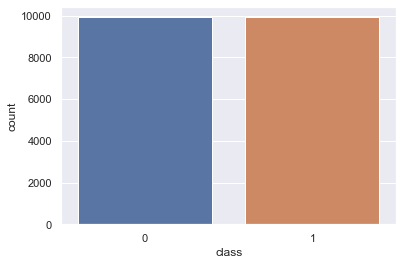

In [38]:
sns.countplot(x=oversampled['class'])
plt.show()

In [39]:
oversampled.head()

,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.0,0.219460,1.1225,1.1961,...,875.855,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,0,0.146240,0.46038,0.28230,1.6294,2.5952,0.0,0.171850,1.1721,1.6018,...,3387.800,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,0,0.000595,0.22612,0.48839,3.1599,84.8740,0.0,0.004572,2.9881,1.0077,...,875.855,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,0,0.024526,0.43236,0.27546,1.7833,-10.1050,0.0,0.024526,1.3057,1.0509,...,5012.600,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,0,0.188290,0.41504,0.34231,1.9279,-58.2740,0.0,0.233580,1.4094,1.3393,...,875.855,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


<b> Feature Selection </b>

ANOVA F Test Method 

In [48]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [49]:
X = oversampled.iloc[:,1:]
y = oversampled['class']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [54]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

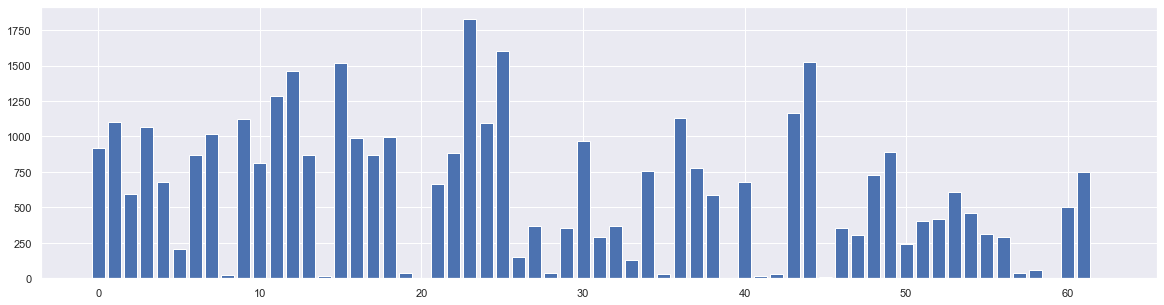

In [55]:
plt.figure(figsize=(20,5)) 
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [56]:
x = np.arange(1,65)
x=np.delete(x,36)

feature_fscore = pd.DataFrame(data=np.column_stack((x,fs.scores_)),columns=['feature','fscore'])
print(feature_fscore.sort_values(by='fscore',ascending = False).head(14))

    feature       fscore
23     24.0  1825.427467
25     26.0  1602.777695
44     46.0  1526.918624
15     16.0  1521.778148
12     13.0  1459.793712
11     12.0  1285.497433
43     45.0  1162.951142
36     38.0  1130.923335
9      10.0  1121.677740
1       2.0  1099.616973
24     25.0  1092.103729
3       4.0  1068.295610
7       8.0  1017.105299
18     19.0   999.571345


Will select the above top features with highest f scores

Check for Correlation between features 

In [57]:
# Create correlation matrix
corr_matrix = oversampled.corr().abs()

In [58]:
high_corr_var=np.where((corr_matrix>0.8) | (corr_matrix<-0.8))

In [59]:
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [60]:
high_corr_var

[('Attr1', 'Attr7'),
 ('Attr1', 'Attr11'),
 ('Attr1', 'Attr14'),
 ('Attr1', 'Attr18'),
 ('Attr2', 'Attr10'),
 ('Attr7', 'Attr11'),
 ('Attr7', 'Attr14'),
 ('Attr7', 'Attr18'),
 ('Attr7', 'Attr22'),
 ('Attr8', 'Attr17'),
 ('Attr10', 'Attr38'),
 ('Attr11', 'Attr14'),
 ('Attr11', 'Attr18'),
 ('Attr11', 'Attr22'),
 ('Attr14', 'Attr18'),
 ('Attr14', 'Attr22'),
 ('Attr16', 'Attr26'),
 ('Attr18', 'Attr22'),
 ('Attr19', 'Attr23'),
 ('Attr19', 'Attr31'),
 ('Attr19', 'Attr42'),
 ('Attr20', 'Attr47'),
 ('Attr22', 'Attr35'),
 ('Attr22', 'Attr48'),
 ('Attr23', 'Attr31'),
 ('Attr28', 'Attr53'),
 ('Attr28', 'Attr54'),
 ('Attr31', 'Attr42'),
 ('Attr32', 'Attr52'),
 ('Attr32', 'Attr62'),
 ('Attr33', 'Attr63'),
 ('Attr38', 'Attr51'),
 ('Attr39', 'Attr42'),
 ('Attr42', 'Attr49'),
 ('Attr52', 'Attr62'),
 ('Attr53', 'Attr54'),
 ('Attr56', 'Attr58')]

<b>Replacing features 16,10,2 to 25,4,8 since 16,10,2 are highly correlated with the exisisting selected features. 
Features 25,4,8 are next in list with highest F scores. </b>

In [61]:
oversampled.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
class,1.00,-0.25,0.28,-0.20,-0.27,-0.22,-0.12,-0.24,-0.26,-0.04,-0.28,-0.24,-0.29,-0.31,-0.24,-0.03,-0.32,-0.26,-0.24,-0.26,0.06,-0.01,-0.22,-0.24,-0.34,-0.28,-0.33,-0.10,-0.16,-0.05,0.16,-0.25,0.14,-0.17,-0.10,-0.24,0.04,-0.28,-0.23,-0.21,0.01,-0.21,0.04,-0.05,-0.28,-0.32,0.02,-0.16,-0.15,-0.23,0.25,0.13,-0.17,-0.17,-0.20,-0.18,-0.14,0.15,-0.06,-0.08,0.00,0.19,-0.23,-0.02
Attr1,-0.25,1.00,-0.26,0.29,0.25,0.28,0.16,0.93,0.20,0.16,0.26,0.85,0.61,0.59,0.93,0.08,0.53,0.20,0.93,0.67,-0.13,0.21,0.77,0.67,0.53,0.29,0.53,0.38,0.26,0.02,-0.27,0.65,-0.21,0.23,0.17,0.72,0.15,0.22,0.54,0.19,-0.03,0.59,-0.09,0.00,0.59,0.27,-0.08,0.71,0.56,0.26,-0.19,-0.21,0.26,0.26,0.17,0.47,0.61,-0.48,0.04,0.10,-0.01,-0.26,0.29,0.15
Attr2,0.28,-0.26,1.00,-0.63,-0.56,-0.52,-0.10,-0.26,-0.68,0.07,-0.97,-0.21,-0.35,-0.33,-0.26,0.17,-0.42,-0.69,-0.26,-0.29,0.07,0.03,-0.17,-0.29,-0.38,-0.74,-0.43,-0.10,-0.41,0.01,0.54,-0.25,0.46,-0.45,-0.23,-0.20,0.15,-0.78,-0.21,-0.35,0.27,-0.23,0.02,0.00,-0.25,-0.52,0.02,-0.13,-0.15,-0.57,0.76,0.47,-0.51,-0.42,-0.32,-0.22,0.01,0.23,0.02,-0.02,0.00,0.48,-0.48,0.04
Attr3,-0.20,0.29,-0.63,1.00,0.66,0.63,0.03,0.30,0.47,0.10,0.64,0.27,0.32,0.25,0.30,-0.14,0.34,0.47,0.30,0.28,-0.00,-0.03,0.22,0.28,0.37,0.48,0.36,0.14,0.61,-0.16,-0.54,0.27,-0.46,0.43,0.29,0.23,0.01,0.58,0.22,0.39,-0.20,0.23,0.14,0.13,0.23,0.59,0.05,0.22,0.22,0.62,-0.57,-0.48,0.58,0.61,0.44,0.20,0.10,-0.20,-0.11,-0.10,-0.10,-0.48,0.48,0.19
Attr4,-0.27,0.25,-0.56,0.66,1.00,0.56,0.04,0.26,0.63,0.08,0.56,0.24,0.36,0.27,0.26,-0.08,0.38,0.64,0.26,0.26,0.02,-0.01,0.20,0.24,0.34,0.44,0.39,0.13,0.50,-0.02,-0.45,0.24,-0.38,0.47,0.28,0.21,-0.01,0.52,0.20,0.48,-0.14,0.21,0.10,0.12,0.23,0.78,0.06,0.18,0.18,0.76,-0.52,-0.38,0.48,0.49,0.41,0.21,0.06,-0.22,-0.04,-0.04,-0.08,-0.40,0.52,0.10
Attr5,-0.22,0.28,-0.52,0.63,0.56,1.00,0.06,0.28,0.43,0.07,0.53,0.26,0.35,0.29,0.28,-0.09,0.36,0.43,0.28,0.30,-0.24,-0.00,0.22,0.27,0.35,0.43,0.37,0.13,0.43,-0.11,-0.62,0.27,-0.57,0.45,0.27,0.22,0.02,0.49,0.21,0.41,-0.15,0.23,-0.05,0.18,0.29,0.59,-0.21,0.22,0.22,0.49,-0.50,-0.58,0.43,0.43,0.34,0.21,0.10,-0.22,-0.09,0.13,-0.15,-0.56,0.48,0.11
Attr6,-0.12,0.16,-0.10,0.03,0.04,0.06,1.00,0.16,0.07,-0.07,0.08,0.12,0.15,0.15,0.16,0.10,0.16,0.08,0.16,0.16,-0.02,0.06,0.15,0.14,0.11,0.17,0.16,-0.00,0.05,0.16,-0.05,0.12,-0.03,0.05,-0.13,0.16,0.01,0.06,0.16,0.02,0.06,0.15,-0.01,-0.00,0.16,0.05,-0.01,0.12,0.12,0.06,-0.05,-0.03,0.06,0.04,0.08,0.06,0.12,-0.06,0.10,0.05,0.01,-0.03,0.07,0.00
Attr7,-0.24,0.93,-0.26,0.30,0.26,0.28,0.16,1.00,0.21,0.16,0.27,0.89,0.62,0.60,1.00,0.09,0.55,0.21,1.00,0.67,-0.11,0.21,0.82,0.65,0.54,0.30,0.53,0.40,0.27,0.03,-0.28,0.66,-0.21,0.23,0.17,0.76,0.16,0.21,0.56,0.21,-0.03,0.61,-0.09,-0.01,0.59,0.27,-0.06,0.76,0.58,0.27,-0.18,-0.21,0.27,0.27,0.18,0.48,0.61,-0.48,0.03,0.10,-0.01,-0.25,0.30,0.15
Attr8,-0.26,0.20,-0.68,0.47,0.63,0.43,0.07,0.21,1.00,-0.01,0.68,0.16,0.32,0.29,0.21,-0.11,0.41,0.97,0.21,0.25,-0.03,0.01,0.12,0.24,0.30,0.53,0.42,0.08,0.32,0.00,-0.44,0.23,-0.35,0.42,0.27,0.15,-0.09,0.56,0.19,0.38,-0.20,0.20,-0.01,0.01,0.23,0.55,-0.01,0.10,0.13,0.66,-0.54,-0.34,0.40,0.33,0.28,0.20,-0.01,-0.21,-0.04,0.02,-0.01,-0.36,0.45,-0.01
Attr9,-0.04,0.16,0.07,0.10,0.08,0.07,-0.07,0.16,-0.01,1.00,-0.04,0.22,0.11,-0.04,0.16,0.08,0.09,-0.02,0.16,0.02,-0.13,0.06,0.19,0.01,0.18,-0.06,0.09,0.14,0.15,-0.29,-0.16,0.02,-0.13,0.20,0.47,0.17,0.66,-0.14,-0.00,0.04,0.07,0.02,-0.20,-0.09,0.10,0.08,-0.12,0.18,0.10,0.14,0.19,-0.15,0.16,0.16,-0.03,0.05,0.17,-0.07,-0.03,0.20,0.19,-0.14,0.22,0.40


<b> Data Modelling </b>

Logistic Regression with Grid Search Hyperparameter Tuning 

In [63]:
#Train and Test Data creation 
X = oversampled[['Attr24',
'Attr26',
'Attr46',
'Attr13',
'Attr12',
'Attr45',
'Attr38',
'Attr25',
'Attr4',
'Attr8']]
y = oversampled['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

"""
Optimal input parameters :

Mean Accuracy: 0.708
Config: {'C': 1000, 'max_iter': 700, 'penalty': 'l2', 'solver': 'sag'}
"""


In [64]:
LR = LogisticRegression(C = 1000, max_iter = 700, penalty = 'l2', solver = 'sag')#Feeding in the parameters from the above output
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

import sklearn.metrics as metrics
print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy = 0.71262
Precision = 0.69864
Recall = 0.75828
F1 score = 0.72724
[[1635  820]
 [ 606 1901]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      2455
           1       0.70      0.76      0.73      2507

    accuracy                           0.71      4962
   macro avg       0.71      0.71      0.71      4962
weighted avg       0.71      0.71      0.71      4962



SVM 

In [67]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores
print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy = 0.70939
Precision = 0.68343
Recall = 0.79138
F1 score = 0.73346
[[1536  919]
 [ 523 1984]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      2455
           1       0.68      0.79      0.73      2507

    accuracy                           0.71      4962
   macro avg       0.71      0.71      0.71      4962
weighted avg       0.71      0.71      0.71      4962



Random forest Model 

In [68]:
#n_estimators = 25, criterion = 'entropy', random_state = 42
forest = RandomForestClassifier()
#
# Fit the model
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)
print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy = 0.91798
Precision = 0.90261
Recall = 0.93897
F1 score = 0.92043
[[2201  254]
 [ 153 2354]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2455
           1       0.90      0.94      0.92      2507

    accuracy                           0.92      4962
   macro avg       0.92      0.92      0.92      4962
weighted avg       0.92      0.92      0.92      4962



XG Boost 

In [69]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

C:\Users\sprab\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.90689
Precision = 0.88834
Recall = 0.93299
F1 score = 0.91012
[[2161  294]
 [ 168 2339]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2455
           1       0.89      0.93      0.91      2507

    accuracy                           0.91      4962
   macro avg       0.91      0.91      0.91      4962
weighted avg       0.91      0.91      0.91      4962

